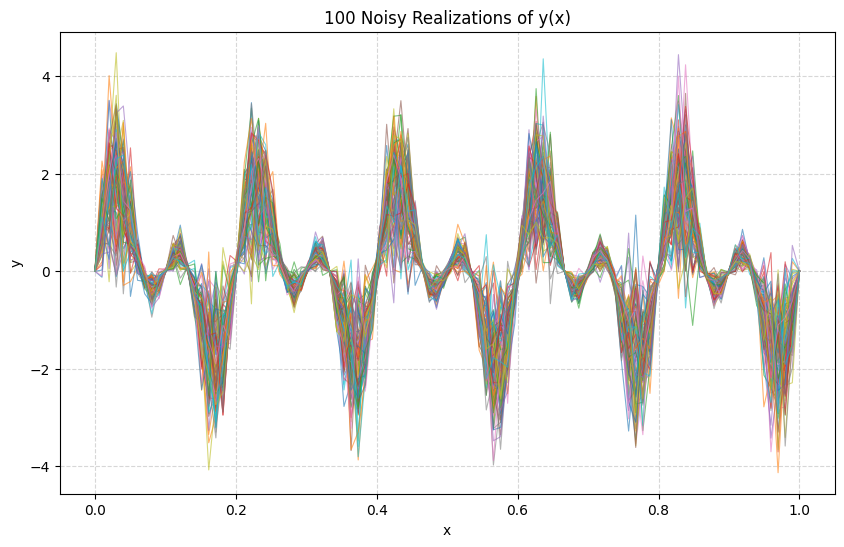

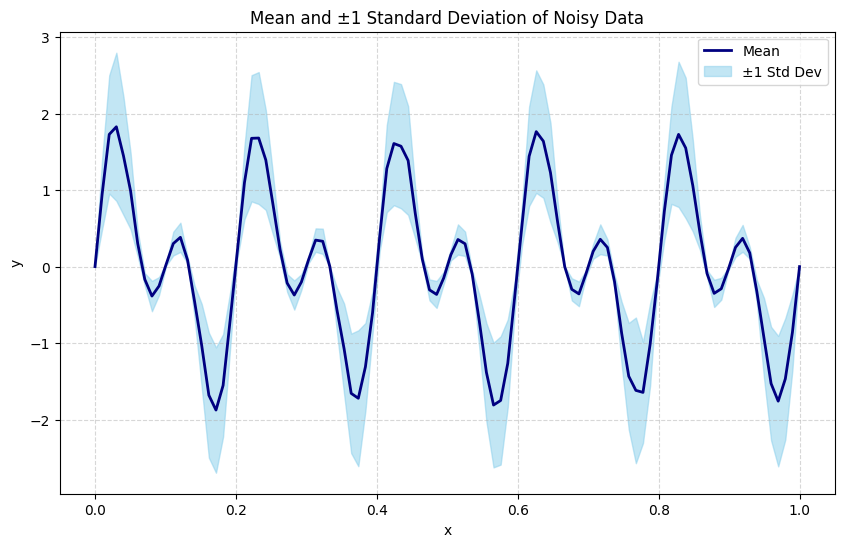

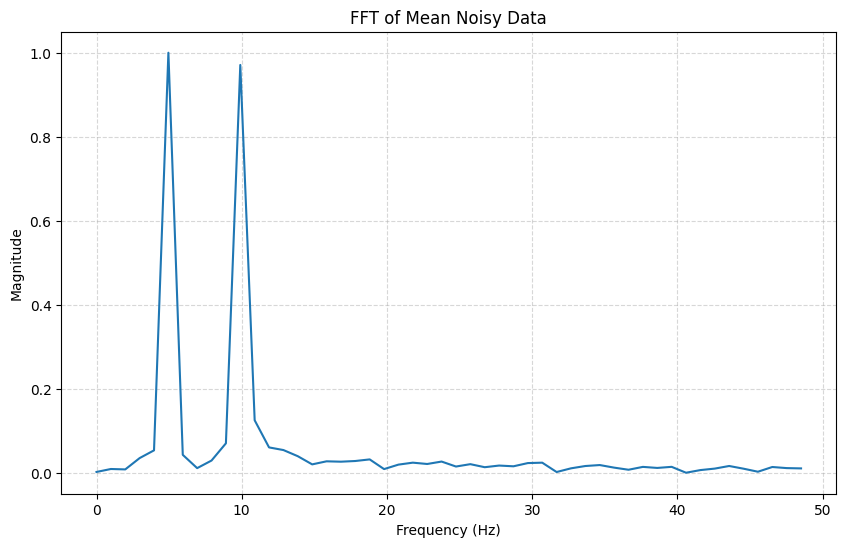

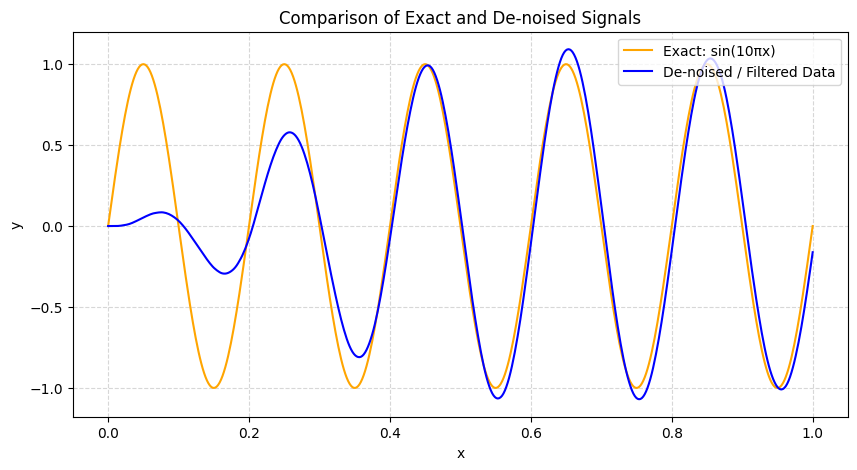

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter
import math


x = np.linspace(0, 1, 100)


y_true = np.sin(10 * np.pi * x) + np.sin(20 * np.pi * x)


n_samples = 100
noisy_data = np.zeros((n_samples, len(x)))

for i in range(n_samples):
    noise_std = np.abs(y_true) / 2
    noise = np.random.normal(0, noise_std)
    noisy_data[i] = y_true + noise


plt.figure(figsize=(10, 6))
for i in range(n_samples):
    plt.plot(x, noisy_data[i], linewidth=0.8, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('100 Noisy Realizations of y(x)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


mean_y = np.mean(noisy_data, axis=0)
std_y = np.std(noisy_data, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(x, mean_y, color='navy', linewidth=2, label='Mean')
plt.fill_between(x, mean_y - std_y, mean_y + std_y, color='skyblue', alpha=0.5, label='±1 Std Dev')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mean and ±1 Standard Deviation of Noisy Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


N = len(x)
T = (x[-1] - x[0]) / (N - 1)

yf = fft(mean_y)
xf = fftfreq(N, T)[:N//2]


plt.figure(figsize=(10,6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Mean Noisy Data')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


N = 500
x_array = np.linspace(0, 1, N)
true_signal = np.sin(10 * np.pi * x_array)


num_samples = 100
noise_std = 0.5
y_noise_list = true_signal + noise_std * np.random.randn(num_samples, N)


fs = 1 / (x_array[1] - x_array[0])
nyq_rate = fs / 2

low = 4 / nyq_rate
high = 6 / nyq_rate
b, a = butter(N=2, Wn=[low, high], btype='band')


y_noise = y_noise_list[0]
y_filtered = lfilter(b, a, y_noise)


plt.figure(figsize=(10, 5))
plt.plot(x_array, true_signal, label="Exact: sin(10πx)", color='orange')
plt.plot(x_array, y_filtered, label="De-noised / Filtered Data", color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Exact and De-noised Signals')
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
